- [1 Input Data and Python Packages](#t1)
- [2 Data Preprocessing and Analysis](#t2)
    - [2.1 Passenger Class](#t2.1)
    - [2.2 Gender](#t2.2)
    - [2.3 Age](#t2.3)
    - [2.4 Number of Family](#t2.4)
    - [2.5 Fare](#t2.5)
    - [2.6 Cabin](#t2.6)
    - [2.7 Embarked](#t2.7)
    - [2.8 Name](#t2.8)
    - [2.9 Ticket](#t2.9)
- [3 Logistic Regression and Results](#t3)
    - [3.1 Feature selection](#t3.1)
    - [3.2 Review of model evaluation procedures](#t3.2)
        - [3.2.1 Model evaluation based on simple train/test split using `train_test_split()` function](#t3.2.1)
        - [3.2.2. Model evaluation based on K-fold cross-validation using `cross_val_score()` function](#t3.2.2)
        - [3.2.3. Model evaluation based on K-fold cross-validation using `cross_validate()` function](#t3.2.3)
    - [3.3 GridSearchCV evaluating using multiple scorers simultaneously](#t3.3)
    - [3.4 GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously](#t3.4)
- [4 Generate Prediction Results](#t4)

    


Reference:
1. <https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python>

<a id="t1"></a>
# 1 Input Data and Python Packages

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("../input/titanic/train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("../input/titanic/test.csv")

# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [4]:
# preview test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


<a id="t2"></a>
# 2 Data Preprocessing and Analysis

In [6]:
train_data = train_df.copy()
test_data = test_df.copy()

train_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)

In [7]:
# check missing values in train data
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

`Age`, `Cabin` and `Embarked` variables in `test_data` have missing data. Remember to fill them.

In [8]:
# check missing values in test data
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

`Age`, `Fare` and `Cabin` variables in `test_data` have missing data. Remember to fill them.

<a id="t2.1"></a>
## 2.1 Passenger Class

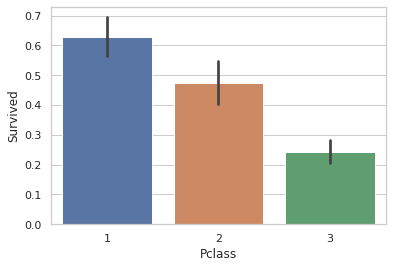

In [9]:
sns.barplot('Pclass', 'Survived', data=train_data)
plt.show()

The first class has the greatest chance of surviving.

In [10]:
#create one-hot code for Pclass in train_data
train_data = pd.get_dummies(train_data, columns=["Pclass"])
train_data.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [11]:
#create one-hot code for Pclass in test_data
test_data = pd.get_dummies(test_data, columns=["Pclass"])
test_data.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


<a id="t2.2"></a>
## 2.2 Gender

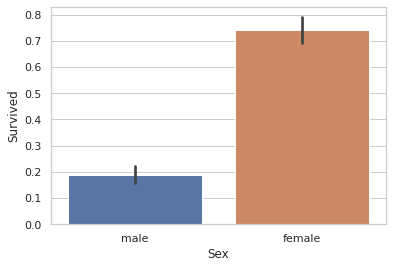

In [12]:
sns.barplot('Sex', 'Survived', data=train_data)
plt.show()

Women's survival probability is about four times that of men.

In [13]:
#create one-hot code for Sex in train_data
train_data = pd.get_dummies(train_data, columns=["Sex"])
train_data.drop('Sex_female', axis=1, inplace=True)
train_data.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,1


In [14]:
#create one-hot code for Sex in test_data
test_data = pd.get_dummies(test_data, columns=["Sex"])
test_data.drop('Sex_female', axis=1, inplace=True)
test_data.head()

,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,1
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,1,0
2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1
3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0


<a id="t2.3"></a>
## 2.3 Age

In [15]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_data['Age'].isnull().sum()/train_data.shape[0])*100))

Percent of missing "Age" records is 19.87%


Let's see what the `Age` variable looks like in general.

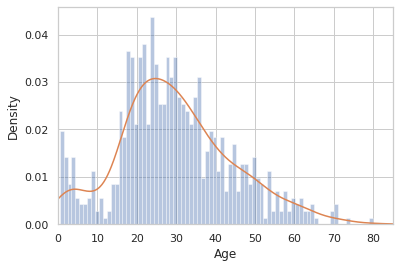

In [16]:
ax = train_data["Age"].hist(bins=80, density=True, stacked=True,  alpha=0.4)
train_data["Age"].plot(kind='density')
ax.set(xlabel='Age')
plt.xlim(0,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [17]:
# mean age
print('The mean of "Age" is %.2f.' %(train_data["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f.' %(train_data["Age"].median(skipna=True)))

The mean of "Age" is 29.70.
The median of "Age" is 28.00.


In [18]:
# use median age to fill Nan in train_data
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,1


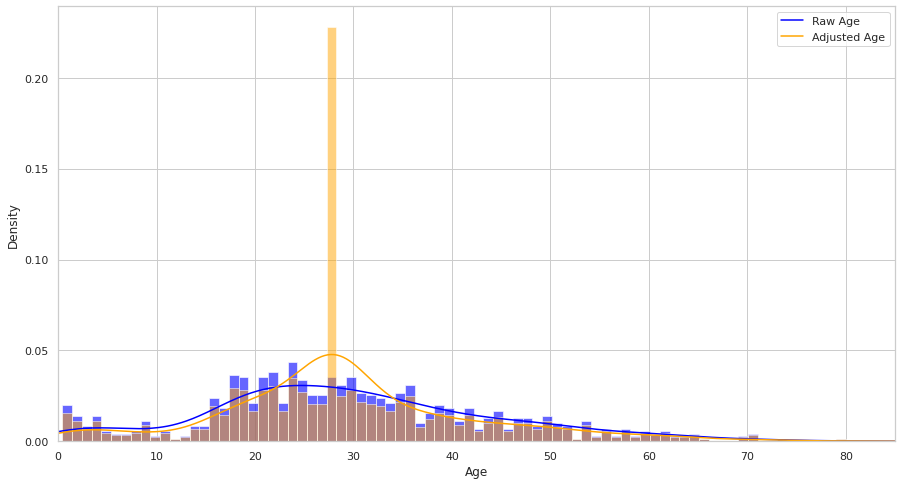

In [19]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=80, density=True, stacked=True, color='blue', alpha=0.6)
train_df["Age"].plot(kind='density', color='blue')
ax = train_data["Age"].hist(bins=80, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(0,85)
plt.show()

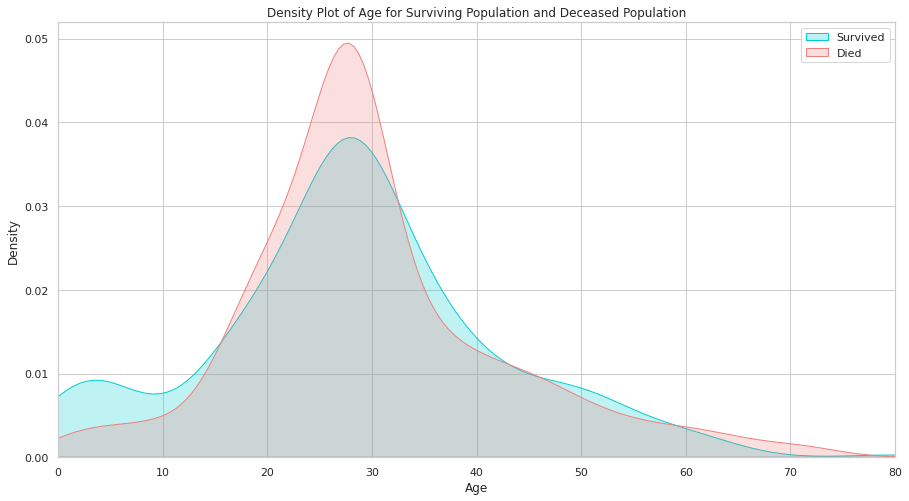

In [20]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(0,80)
plt.show()

In [21]:
# use median age to fill Nan in test_data
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data.head()

,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,1
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,1,0
2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1
3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0


In [22]:
train_data['IsMinor']=np.where(train_data['Age']<=16, 1, 0)
test_data['IsMinor']=np.where(test_data['Age']<=16, 1, 0)

<a id="t2.4"></a>
## 2.4 Number of Family

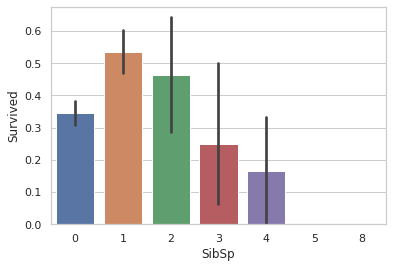

In [23]:
sns.barplot('SibSp', 'Survived', data=train_data)
plt.show()

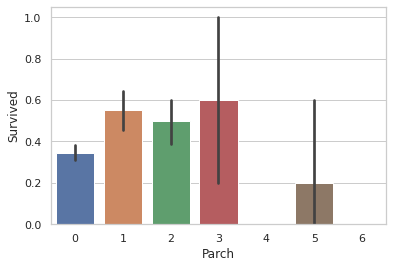

In [24]:
sns.barplot('Parch', 'Survived', data=train_data)
plt.show()

According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family.

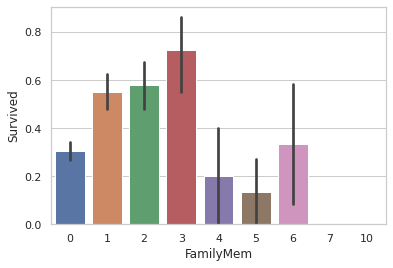

In [25]:
train_data['FamilyMem']=train_data["SibSp"]+train_data["Parch"]
sns.barplot('FamilyMem', 'Survived', data=train_data)
plt.show()

In [26]:
## Create categorical variable for 'TravelAlone', 'SmallFam' and 'LargeFam' in train_data
train_data['TravelAlone']=np.where(train_data['FamilyMem']==0, 1, 0)
train_data['SmallFam']=np.where(((train_data['FamilyMem']>0) & (train_data['FamilyMem']<=3)), 1, 0)
train_data['LargeFam']=np.where((train_data['FamilyMem']>3), 1, 0)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.head()

,Survived,Name,Age,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_male,IsMinor,FamilyMem,TravelAlone,SmallFam,LargeFam
0,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,S,0,0,1,1,0,1,0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,C,1,0,0,0,0,1,0,1,0
2,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0,1,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,S,1,0,0,0,0,1,0,1,0
4,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,S,0,0,1,1,0,0,1,0,0


In [27]:
## Create categorical variable for 'TravelAlone', 'SmallFam' and 'LargeFam' in train_data
test_data['FamilyMem']=test_data["SibSp"]+test_data["Parch"]
test_data['TravelAlone']=np.where(test_data['FamilyMem']==0, 1, 0)
test_data['SmallFam']=np.where(((test_data['FamilyMem']>0) & (test_data['FamilyMem']<=3)), 1, 0)
test_data['LargeFam']=np.where((test_data['FamilyMem']>3), 1, 0)
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)
test_data.head()

,Name,Age,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_male,IsMinor,FamilyMem,TravelAlone,SmallFam,LargeFam
0,"Kelly, Mr. James",34.5,330911,7.8292,NaN,Q,0,0,1,1,0,0,1,0,0
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,NaN,S,0,0,1,0,0,1,0,1,0
2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,NaN,Q,0,1,0,1,0,0,1,0,0
3,"Wirz, Mr. Albert",27.0,315154,8.6625,NaN,S,0,0,1,1,0,0,1,0,0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,NaN,S,0,0,1,0,0,2,0,1,0


<a id="t2.5"></a>
## 2.5 Fare

In [28]:
# use median in train_data to fill Nan for 'Fare' in test_data
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)

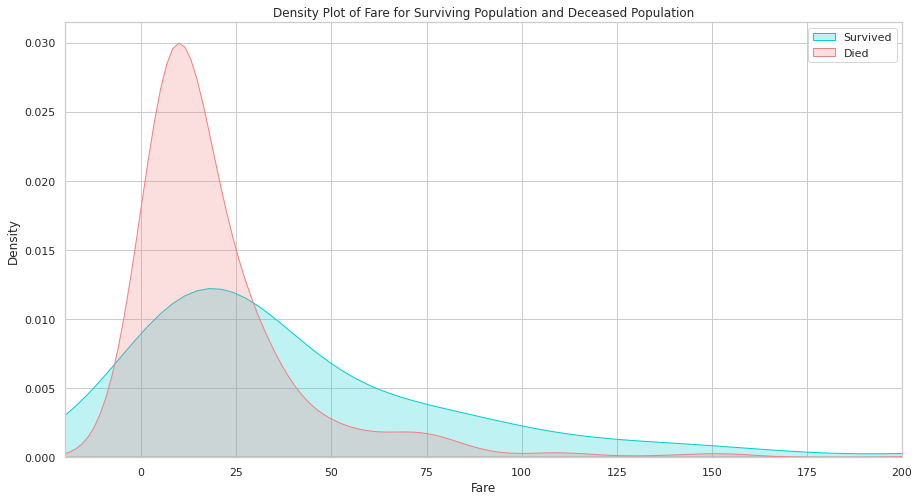

In [29]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

When `Fare` is larger than 30, the surivial rate increase greatly. Maybe it is highly related to the passenger class.

<a id="t2.6"></a>
## 2.6 Cabin

In [30]:
train_data.drop('Cabin', axis=1, inplace=True)
train_data.head()

,Survived,Name,Age,Ticket,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_male,IsMinor,FamilyMem,TravelAlone,SmallFam,LargeFam
0,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,S,0,0,1,1,0,1,0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C,1,0,0,0,0,1,0,1,0
2,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,0,1,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,S,1,0,0,0,0,1,0,1,0
4,0,"Allen, Mr. William Henry",35.0,373450,8.0500,S,0,0,1,1,0,0,1,0,0


In [31]:
test_data.drop('Cabin', axis=1, inplace=True)
test_data.head()

,Name,Age,Ticket,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_male,IsMinor,FamilyMem,TravelAlone,SmallFam,LargeFam
0,"Kelly, Mr. James",34.5,330911,7.8292,Q,0,0,1,1,0,0,1,0,0
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,S,0,0,1,0,0,1,0,1,0
2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,Q,0,1,0,1,0,0,1,0,0
3,"Wirz, Mr. Albert",27.0,315154,8.6625,S,0,0,1,1,0,0,1,0,0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,S,0,0,1,0,0,2,0,1,0


<a id="t2.7"></a>
## 2.7 Embarked

In [32]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

In [33]:
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.head()

,Survived,Name,Age,Ticket,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_male,IsMinor,FamilyMem,TravelAlone,SmallFam,LargeFam
0,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,S,0,0,1,1,0,1,0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C,1,0,0,0,0,1,0,1,0
2,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,0,1,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,S,1,0,0,0,0,1,0,1,0
4,0,"Allen, Mr. William Henry",35.0,373450,8.0500,S,0,0,1,1,0,0,1,0,0


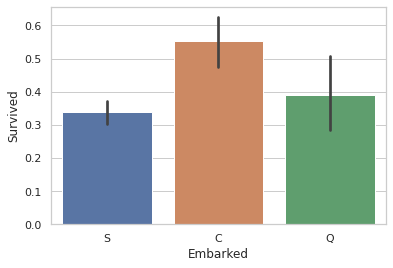

In [34]:
sns.barplot('Embarked', 'Survived', data=train_data)
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).
It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

In [35]:
#create one-hot code for Embarked in train_data
train_data = pd.get_dummies(train_data, columns=["Embarked"])
train_data.head()

,Survived,Name,Age,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,IsMinor,FamilyMem,TravelAlone,SmallFam,LargeFam,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,1,0,1,0,1,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,0,0,0,0,1,0,1,0,1,0,0
2,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,1,0,0,0,1,0,0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,1,0,0,0,0,1,0,1,0,0,0,1
4,0,"Allen, Mr. William Henry",35.0,373450,8.0500,0,0,1,1,0,0,1,0,0,0,0,1


In [36]:
#create one-hot code for Embarked in test_data
test_data = pd.get_dummies(test_data, columns=["Embarked"])
test_data.head()

,Name,Age,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,IsMinor,FamilyMem,TravelAlone,SmallFam,LargeFam,Embarked_C,Embarked_Q,Embarked_S
0,"Kelly, Mr. James",34.5,330911,7.8292,0,0,1,1,0,0,1,0,0,0,1,0
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,0,1,0,0,1,0,1,0,0,0,1
2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,0,1,0,1,0,0,1,0,0,0,1,0
3,"Wirz, Mr. Albert",27.0,315154,8.6625,0,0,1,1,0,0,1,0,0,0,0,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,0,1,0,0,2,0,1,0,0,0,1


<a id="t2.8"></a>
## 2.8 Name

In [37]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

<a id="t2.9"></a>
## 2.9 Ticket

In [38]:
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

<a id="t3"></a>
# 3 Logistic Regression and Results

<a id="t3.1"></a>
## 3.1 Feature selection

### Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 6
Selected features: ['SmallFam', 'LargeFam', 'Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor']


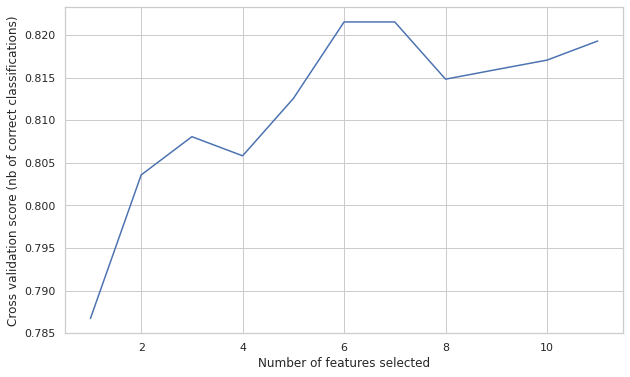

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

cols = ["Age","Fare","TravelAlone","SmallFam","LargeFam","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = train_data[cols]
y = train_data['Survived']

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

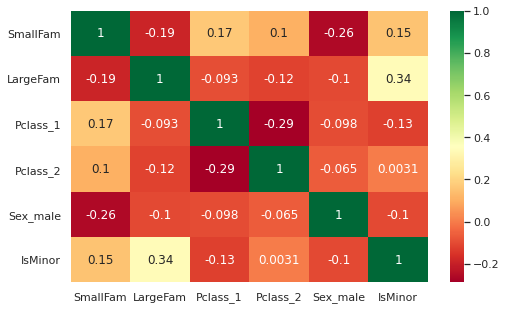

In [40]:
Selected_features = ['SmallFam', 'LargeFam', 'Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor']
X = train_data[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

<a id="t3.2"></a>
## 3.2 Review of model evaluation procedures

Motivation: Need a way to choose between machine learning models
- Goal is to estimate likely performance of a model on out-of-sample data

Initial idea: Train and test on the same data
- But, maximizing training accuracy rewards overly complex models which overfit the training data

Alternative idea: Train/test split
- Split the dataset into two pieces, so that the model can be trained and tested on different data
- Testing accuracy is a better estimate than training accuracy of out-of-sample performance
- Problem with train/test split
    - It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
    - Testing accuracy can change a lot depending on a which observation happen to be in the testing set

Reference:
<http://www.ritchieng.com/machine-learning-cross-validation/>

<a id="t3.2.1"></a>
### 3.2.1 Model evaluation based on simple train/test split using `train_test_split()` function

Train/Test split results:
LogisticRegression accuracy is 0.799
LogisticRegression log_loss is 0.499
LogisticRegression auc is 0.831


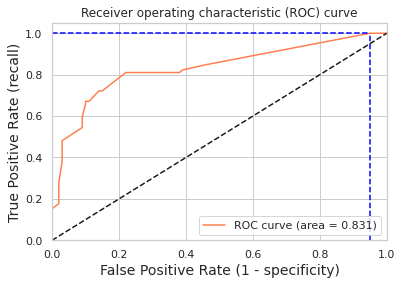

Using a threshold of 0.080 guarantees a sensitivity of 1.000 and a specificity of 0.050, i.e. a false positive rate of 95.00%.


In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = train_data[Selected_features]
y = train_data['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

<a id="t3.2.2"></a>
### 3.2.2. Model evaluation based on K-fold cross-validation using `cross_val_score()` function

In [42]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.822
LogisticRegression average log_loss is 0.439
LogisticRegression average auc is 0.860


<a id="t3.2.3"></a>
### 3.2.3. Model evaluation based on K-fold cross-validation using `cross_validate()` function

In [43]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.822 (+/-0.027)
LogisticRegression average log_loss: 0.439 (+/-0.038)
LogisticRegression average auc: 0.860 (+/-0.029)


<a id="t3.3"></a>
## 3.3 GridSearchCV evaluating using multiple scorers simultaneously

best params: LogisticRegression(C=0.80001)
best params: {'C': 0.80001}
best score: 0.8215480649188514


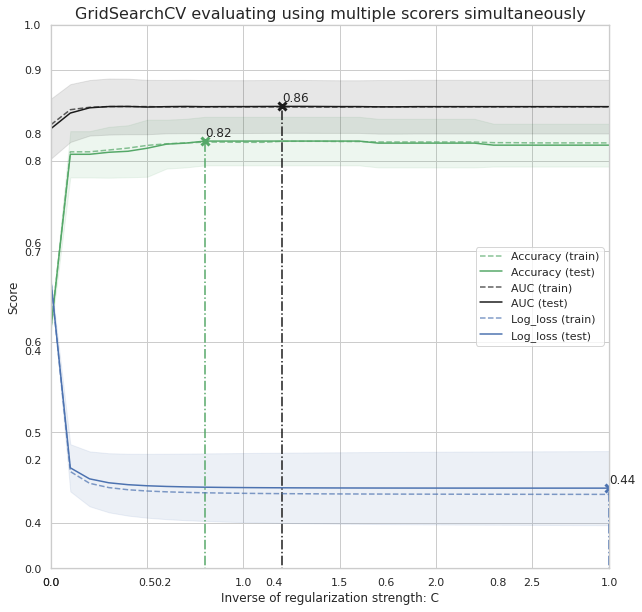

In [44]:
from sklearn.model_selection import GridSearchCV

X = train_data[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

<a id="t3.4"></a>
## 3.4 GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously

We can applied many tasks together for more in-depth evaluation like gridsearch using cross-validation based on k-folds repeated many times, that can be scaled or no with respect to many scorers and tunning on parameter for a given estimator!

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=2.00001))])
best params: {'clf__C': 2.00001}
best score: 0.8163957064842132


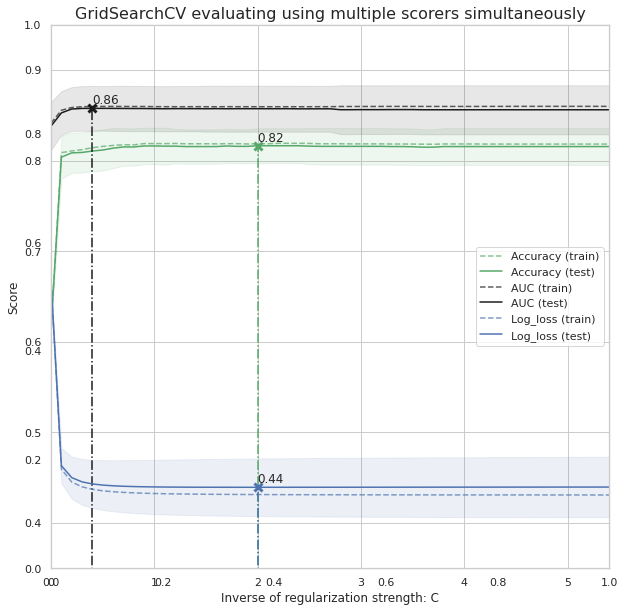

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

<a id="t4"></a>
# 4 Generate Prediction Results

In [46]:
test_data['Survived'] = log_clf.predict(test_data[Selected_features])
test_data['PassengerId'] = test_df['PassengerId']

submission = test_data[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
